### Exercise 1

### 1. Open the file './befkbhalderstatkode.csv'
### 2. Turn the csv file into a numpy ndarray with np.genfromtxt(filename, delimiter=',', dtype=np.uint, skip_header=1)

In [76]:
import numpy as np
import matplotlib.pyplot as plt
data = np.genfromtxt('./befkbhalderstatkode.csv', delimiter=',', dtype=np.uint, skip_header=1)
print(data)

[[2015    1    0 5100  614]
 [2015    1    0 5104    2]
 [2015    1    0 5106    1]
 ...
 [1992   99   89 5100    1]
 [1992   99   90 5180    1]
 [1992   99   93 5100    1]]


### 3. Using this data: Find out how many people lived in each of the 11 areas in 2015

In [77]:
neighb = {1: 'Indre By', 2: 'Østerbro', 3: 'Nørrebro', 4: 'Vesterbro/\nKgs. Enghave', 5: 'Valby', 6: 'Vanløse', 7: 'Brønshøj-Husum', 8: 'Bispebjerg', 9: 'Amager Øst', 10: 'Amager Vest', 99: 'Udenfor'}


result = {row[1] : result.get(row[1], 0) + row[4] if row[0] == 2015 else result.get(row[1], 0) for row in data}
print(result)

{1: 51937.0, 2: 75113.0, 3: 78802.0, 4: 61623.0, 5: 51727.0, 6: 39537.0, 7: 43908.0, 8: 53604.0, 9: 55205.0, 10: 64967.0, 99: 3872.0}


### 4. Make a bar plot to show the size of each city area from the smallest to the largest

Text(0.5, 1.0, 'People lived in areas in 2015')

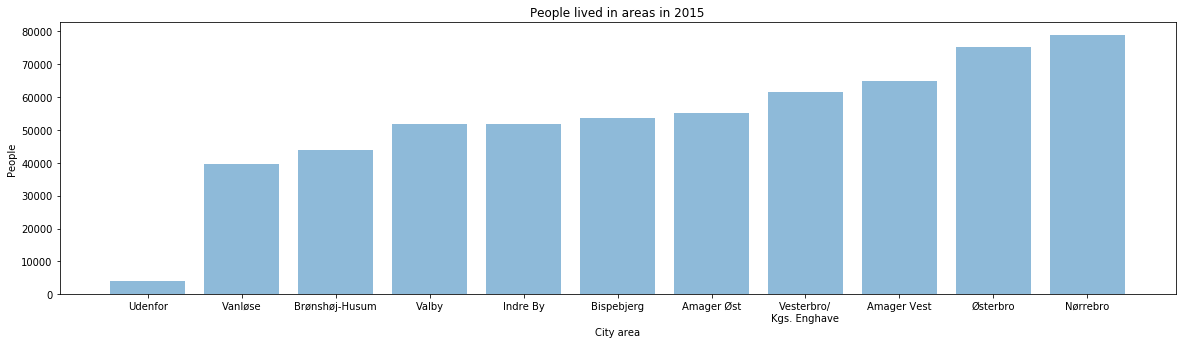

In [46]:
result = {k: v for k, v in sorted(result.items(), key=lambda item: item[1])}

yBar = [neighb[l] for l in result]
xBar = result.values()

plt.figure(figsize=(20, 5))
plt.bar(yBar, xBar, align='center', alpha=0.5,)
plt.ylabel('People')
plt.xlabel('City area')
plt.title('People lived in areas in 2015')

### 5. Create a boolean mask to find out how many people above 65 years lived in Copenhagen in 2015
### 6. How many of those were from the other nordic countries (not dk)

In [78]:
mask = (data[:,0] == 2015) & (data[:,2] >= 65) & (data[:,1] != 99)
print('People above 65, year 2015, who lived in cph: {}'.format(np.sum(data[mask][:,4])))
mask = (data[:,0] == 2015) & (data[:,2] >= 65) & (data[:,1] == 99)
print('People above 65, year 2015, who lived in orther nordic countries: {}'.format(np.sum(data[mask][:,4])))

People above 65, year 2015, who lived in cph: 59799
People above 65, year 2015, who lived in orther nordic countries: 60


7. Make a line plot showing the changes of number of people in vesterbro and østerbro from 1992 to 2015

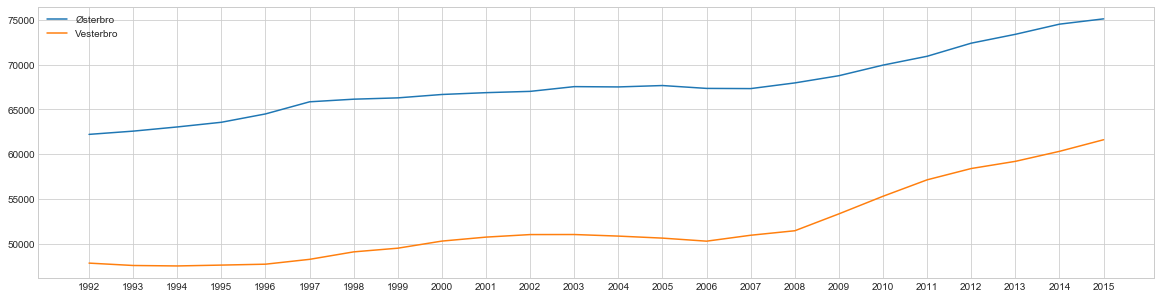

In [112]:
def numberOfPeoplePerYear(n, mask):
    allPeopleInGivenN = data[mask & (data[:,0] == n)]
    sumOfPeople = allPeopleInGivenN[:,4].sum() # index 4 is no of 'PERSONER'
    return sumOfPeople

maskOst = (data[:,0] >= 1992) & (data[:,0] <= 2015) & (data[:,1] == 2)
maskVest = (data[:,0] >= 1992) & (data[:,0] <= 2015) & (data[:,1] == 4)

yBar = list(set(data[maskOst][:,0]))
xBarOst =  np.array([numberOfPeoplePerYear(n, maskOst) for n in yBar])
xBarVest =  np.array([numberOfPeoplePerYear(n, maskVest) for n in yBar])

plt.figure(figsize=(20,5))
plt.style.use('seaborn-whitegrid')
plt.plot(yBar, xBarOst, label='Østerbro')
plt.plot(yBar, xBarVest, label='Vesterbro')
plt.xticks(yBar)
plt.legend()

#print(data[mask][:,0])
